<a href="https://colab.research.google.com/github/gabimuir/ForageTumor/blob/master/Lung_Set_Exploration_Gabi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Lung Dataset using the first 50 entries

These are on our github in the patients1-50.zip 

In [1]:
#Unzip the file
!unzip "patients1_50.zip"


Archive:  patients1_50.zip
   creating: patients1_50/
   creating: patients1_50/patient00044/
   creating: patients1_50/patient00044/study2/
  inflating: patients1_50/patient00044/study2/view1_frontal.jpg  
   creating: __MACOSX/
   creating: __MACOSX/patients1_50/
   creating: __MACOSX/patients1_50/patient00044/
   creating: __MACOSX/patients1_50/patient00044/study2/
  inflating: __MACOSX/patients1_50/patient00044/study2/._view1_frontal.jpg  
  inflating: __MACOSX/patients1_50/patient00044/._study2  
   creating: patients1_50/patient00044/study5/
  inflating: patients1_50/patient00044/study5/view1_frontal.jpg  
   creating: __MACOSX/patients1_50/patient00044/study5/
  inflating: __MACOSX/patients1_50/patient00044/study5/._view1_frontal.jpg  
  inflating: __MACOSX/patients1_50/patient00044/._study5  
   creating: patients1_50/patient00044/study4/
  inflating: patients1_50/patient00044/study4/view1_frontal.jpg  
   creating: __MACOSX/patients1_50/patient00044/study4/
  inflating: __MACO

We also need to upload the csv file, which has the filenames and the results

In [0]:
filename = 'train.csv'

Some parameters to start

In [7]:
import pandas as pd

df = pd.read_csv(filename)

df.head(10)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Lateral,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
8,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Lateral,NaN,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
9,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


The data set has the path to the file, sex, age, directon of the image (lateral vs frontal). AP vs PA (and NaN) (what does this column mean?)

In [8]:
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [0]:
outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

There are 14 outcomes, one of which is 'no finding'. To start, our goal is to make a binary classifier to see if the lungs are healthy or not.

We think there might be bias towards illness, since a person without any symptoms would not get an x-ray done.

In [10]:
df['Consolidation'].value_counts()


 0.0    28097
-1.0    27742
 1.0    14783
Name: Consolidation, dtype: int64

Get the first 50 for the little testing set

In [0]:
df_sample = df.head(50)


## Remaking the urls for the 1-50 sample set

preprocessing for the images into keras - there's a 'flow from dataframe' method in keras. First, for this baby test set, we have to translate "CheXpert-v1.0-small/train/" from the image urls to 'patients1_50/'

In [13]:
df_sample.iloc[0]['Path']

'CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'

In [14]:
def edit_urls(url):
  pieces = url.split('/')
  newpath = 'patients1_50'
  newurl = ''
  
  #hard coding that 0 and 1 are the old path. ('CheXpert-v1.0-small/train/')
  for i, piece in enumerate(pieces):
    if i > 1:
      newurl+= '/' + piece
    elif i == 1:
      newurl += newpath
  
  return newurl
  
#testing
print(edit_urls(df_sample.iloc[0]['Path']))

patients1_50/patient00001/study1/view1_frontal.jpg


Now use that method on the data frame to edit the urls for this sample set

In [15]:
df_sample['Path'] = df_sample['Path'].apply(edit_urls)
df_sample.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,patients1_50/patient00001/study1/view1_frontal...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,patients1_50/patient00002/study2/view1_frontal...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,patients1_50/patient00002/study1/view1_frontal...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,patients1_50/patient00002/study1/view2_lateral...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,patients1_50/patient00003/study1/view1_frontal...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [0]:
df_sample.to_csv('patients1_50.csv', index=False)

## Looking at correlation between age/sex and outcome

This is just for the first 50 entries, not even randomly sampled...

In [123]:
df = df_sample
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,patients1_50/patient00001/study1/view1_frontal...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,patients1_50/patient00002/study2/view1_frontal...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,patients1_50/patient00002/study1/view1_frontal...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,patients1_50/patient00002/study1/view2_lateral...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,patients1_50/patient00003/study1/view1_frontal...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Approach: ignore the images, other outcomes, just male/female and age finding/no finding

Some more notes about the dataset: there are multiple studies for some patients. Ex: patient 2 has two images from when she was 83, one frontal and one lateral, then another study four years later with different results.

In [124]:
outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

df[outcomes] = df[outcomes].fillna(0).astype(int)
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,patients1_50/patient00001/study1/view1_frontal...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,patients1_50/patient00002/study2/view1_frontal...,Female,87,Frontal,AP,0,0,-1,1,0,-1,-1,0,-1,0,-1,0,1,0
2,patients1_50/patient00002/study1/view1_frontal...,Female,83,Frontal,AP,0,0,0,1,0,0,-1,0,0,0,0,0,1,0
3,patients1_50/patient00002/study1/view2_lateral...,Female,83,Lateral,NaN,0,0,0,1,0,0,-1,0,0,0,0,0,1,0
4,patients1_50/patient00003/study1/view1_frontal...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [125]:
df['Sex'][df['Sex'] == 'Male'] = 0
df['Sex'][df['Sex'] == 'Female'] = 1

df['Sex'] = pd.to_numeric(df['Sex'])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,patients1_50/patient00001/study1/view1_frontal...,1,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,patients1_50/patient00002/study2/view1_frontal...,1,87,Frontal,AP,0,0,-1,1,0,-1,-1,0,-1,0,-1,0,1,0
2,patients1_50/patient00002/study1/view1_frontal...,1,83,Frontal,AP,0,0,0,1,0,0,-1,0,0,0,0,0,1,0
3,patients1_50/patient00002/study1/view2_lateral...,1,83,Lateral,NaN,0,0,0,1,0,0,-1,0,0,0,0,0,1,0
4,patients1_50/patient00003/study1/view1_frontal...,0,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [126]:
df.groupby(df.Sex)['Sex'].count()

Sex
0    13
1    37
Name: Sex, dtype: int64

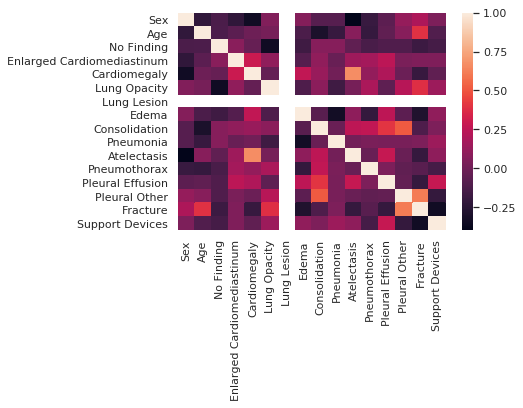

In [127]:
import seaborn as sns
sns.set(style='white')

corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

From this very small sample, there does not appear to be a strong correlation between age or sex and 'no finding'

,Sex,Age,No Finding
Sex,1.000000,-0.215359,-0.125480
Age,-0.215359,1.000000,-0.119812
No Finding,-0.125480,-0.119812,1.000000


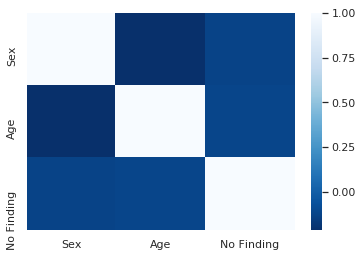

In [128]:
from matplotlib.colors import LogNorm

sns.set(style='white')

correlation_matrix = df.corr()

baby_corr = correlation_matrix.iloc[0:3,0:3]

display(baby_corr)

sns.heatmap(baby_corr, 
        xticklabels = baby_corr.columns,
        yticklabels = baby_corr.columns,
        cmap = 'Blues_r'
           )
plt.show()

## Ready to start messing with the image?

Now we have a csv for just the sample images to play with.

In [129]:
df = pd.read_csv('patients1_50.csv')
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,patients1_50/patient00001/study1/view1_frontal...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,patients1_50/patient00002/study2/view1_frontal...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,patients1_50/patient00002/study1/view1_frontal...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,patients1_50/patient00002/study1/view2_lateral...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,patients1_50/patient00003/study1/view1_frontal...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [130]:
df.groupby('No Finding')['No Finding'].count()

No Finding
1.0    11
Name: No Finding, dtype: int64

We're going to assume that all 'nan's for no finding are 0s - sick

In [0]:
df['No Finding'] = df['No Finding'].fillna(0).astype(int)

By testing the preprocessign, it appears we have to turn the 0s and 1s into strings for labels?

In [0]:
df['No Finding'] = df['No Finding'].apply(str)

Now doing some setup for the image data generator

to make a frontal-only dataframe

In [133]:
df_frontal = df[df['Frontal/Lateral'] == 'Frontal']
df_frontal.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,patients1_50/patient00001/study1/view1_frontal...,Female,68,Frontal,AP,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,patients1_50/patient00002/study2/view1_frontal...,Female,87,Frontal,AP,0,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,patients1_50/patient00002/study1/view1_frontal...,Female,83,Frontal,AP,0,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,patients1_50/patient00003/study1/view1_frontal...,Male,41,Frontal,AP,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,patients1_50/patient00004/study1/view1_frontal...,Female,20,Frontal,PA,1,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [134]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_dataframe(
    df, 
    directory=None, 
    x_col='Path', 
    y_col='No Finding', 
    target_size=(256, 256), 
    color_mode='grayscale', 
    classes=None, 
    class_mode='binary', #change to categorical with multiclass? (unhot encode?)
    batch_size=40, #taking 40/50 in a batch
    shuffle=True, 
    seed=None, 
    save_to_dir='', 
    save_prefix='test', 
    save_format='png', 
    subset=None, 
    interpolation='nearest', 
    drop_duplicates=True
)

test_generator = datagen.flow_from_dataframe(
    df, 
    directory=None, 
    x_col='Path', 
    y_col='No Finding', 
    target_size=(256, 256), 
    color_mode='grayscale', 
    classes=None, 
    class_mode='binary', #change to categorical with multiclass? (unhot encode?)
    batch_size=10, #taking 10 from the batch
    shuffle=True, 
    seed=None, 
    save_to_dir='', 
    save_prefix='test', 
    save_format='png', 
    subset=None, 
    interpolation='nearest', 
    drop_duplicates=True
)

# returns (x,y) where x is a numpy array of images and y are the labels
# x is of shape (batch_size, *target_size, channels)


Found 50 validated image filenames belonging to 2 classes.
Found 50 validated image filenames belonging to 2 classes.


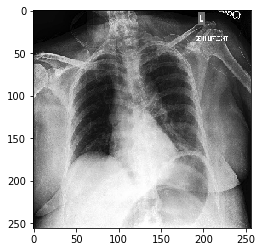

In [60]:
import matplotlib.pyplot as plt

firstbatch = train_generator[0] #the first batch has all of them
images, labels = firstbatch

plt.imshow( images[0, :, :, 0], cmap="gray")
plt.show()

# Making a first model

## Hotdog not hotdog but with lungs

some binary classification stuff, just like hotdog-nothotdog

In [0]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.train.AdamOptimizer(),
    metrics=['accuracy']
)

In [137]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=4,
        validation_data=test_generator,
        validation_steps=15
)

Epoch 1/4
15/15 [==============================] - 2s 148ms/step - loss: 0.6447 - acc: 0.8462 - val_loss: 0.1615 - val_acc: 0.9400
Epoch 2/4
15/15 [==============================] - 2s 138ms/step - loss: 0.3468 - acc: 0.8972 - val_loss: 0.0169 - val_acc: 1.0000
Epoch 3/4
15/15 [==============================] - 2s 141ms/step - loss: 0.1023 - acc: 0.9692 - val_loss: 0.0521 - val_acc: 0.9800
Epoch 4/4
15/15 [==============================] - 2s 141ms/step - loss: 0.0222 - acc: 0.9944 - val_loss: 0.0101 - val_acc: 1.0000


code from Alex's hotdog not hotdog

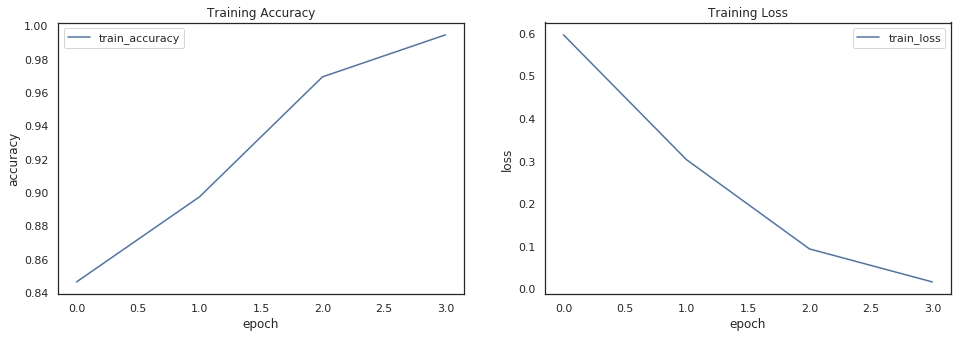

In [138]:
#evaluates model
import numpy as np
import matplotlib.pyplot as plt

def model_eval(history):
  plt.figure(figsize=(16,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['acc'])
  plt.title('Training Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy'], loc='best')
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.title('Training Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss'], loc='best')
  
model_eval(history)

In [150]:
predictions = model.predict(test_generator)
predicted_label = np.argmax(predictions, axis=1)
print(predictions[1])

[0.9977093  0.00229067]


In [182]:
pred2 = int(round(np.max(predictions)))
print(pred2)
print(test_generator[0][1])

1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
import numpy as np

class_names = ["Sick", "Not Sick"]

# Utility function to plot image and actual label

def plot_image(i, predictions_array, labels, img):
  
  prediction = predictions_array[i]
  true_label = int(labels[i])

  # Remove grid, x and y axis ticks from the chart
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  # Plot the image
  plt.imshow( img[i, :, :, 0], cmap="gray")

  # Set predicted_label to the highest value from the prediction result
  if prediction[0] > prediction[1]:
    predicted_label = 0
  else:
    predicted_label = 1
  predicted_label = int(round(predicted_label))

  # Set color to blue on a correct prediction, otherwise set color to red
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  # Print the predicted label, confidence number, and actual label
  plt.xlabel("{} ({:2.0f}%) vs {}".format(class_names[predicted_label],
                                100*np.max(prediction),
                                class_names[true_label]),
                                color=color)
  

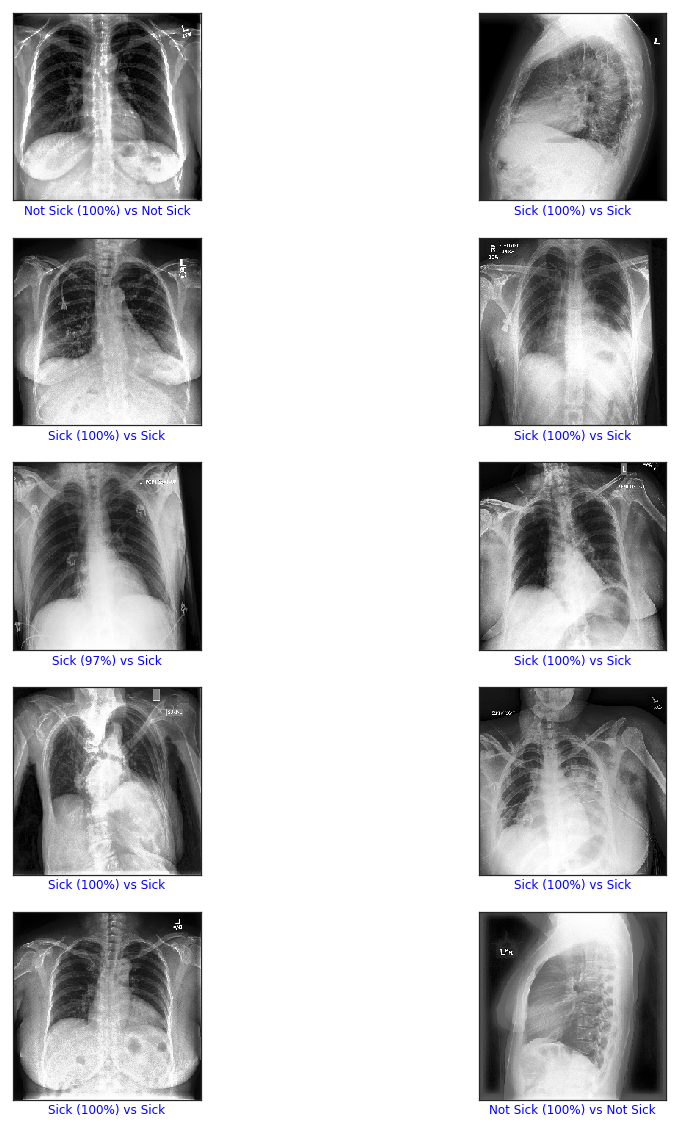

In [187]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(4*2*num_cols, 4*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_generator[0][1], test_generator[0][0])

## Testing the filter finder tensorflow thing

Some code from our 'convolutional neural network' colab

In [0]:
import tensorflow as tf

image_count, image_height, image_width, color_channels = images.shape
X = tf.placeholder(tf.float32, shape=(None, image_height, image_width, color_channels))

convolution = tf.layers.conv2d(
    X, filters=3, kernel_size=5, strides=[2,2], padding="SAME"
)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  output = sess.run(convolution, feed_dict={X: images})

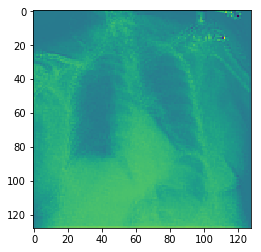

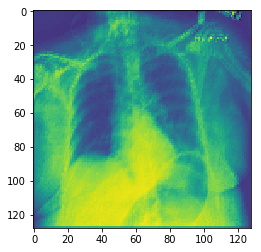

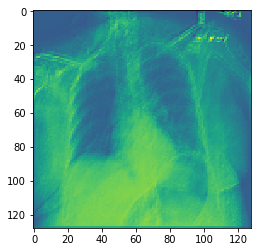

In [62]:
import matplotlib.pyplot as plt

plt.imshow(output[0, :, :, 0])
plt.show()

plt.imshow(output[0, :, :, 1])
plt.show()

plt.imshow(output[0, :, :, 2])
plt.show()
